First, make sure you can load, read and show an image from the dataset.

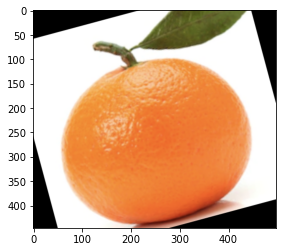

In [2]:
%matplotlib inline
# The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
# ~ thank you Ritu dhoot (https://stackoverflow.com/a/53079880)
import cv2 as cv
from matplotlib import pyplot as plt

#Import image
image = cv.imread("./dataset/train/freshoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.50.14 PM.png")

#Show the image with matplotlib
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()

Try to isolate this apple, let's remove the background using GrabCut algorithm.

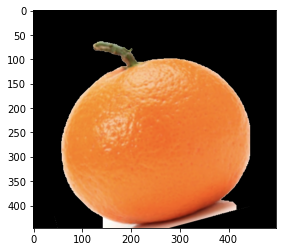

In [3]:
%matplotlib inline
import numpy as np

def grab(image):
    #Create a center of interest rectangle
    margin = .1
    (image_width, image_height, channels) = image.shape
    rect = (int(margin*image_width),int(margin*image_height),int((1-margin)*image_width),int((1-margin)*image_height))

    #Execute grab cut
    mask = np.zeros(image.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    cv.grabCut(image,mask,rect,bgdModel,fgdModel,3,cv.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    return image*mask2[:,:,np.newaxis]

#Show the image with matplotlib
plt.imshow(cv.cvtColor(grab(image), cv.COLOR_BGR2RGB))
plt.show()

Now, make sure you can load train, test images from the dataset :

In [4]:
import random
from os import walk

def load_images(datasetpath):
    filenames = next(walk(datasetpath), (None, None, []))[2]
    # 💡 Comment the line above if you want to load the whole dataset
    filenames = random.sample(filenames, 100)
    return [grab(cv.imread('./{}/{}'.format(datasetpath, filename))) for filename in filenames]

test_fresh_oranges = load_images("./dataset/test/freshoranges")
test_rotten_oranges = load_images("./dataset/test/rottenoranges")
train_fresh_oranges = load_images("./dataset/train/freshoranges")
train_rotten_oranges = load_images("./dataset/train/rottenoranges")


Now, let's compate fresh orange histograms vs rotten orange histograms.

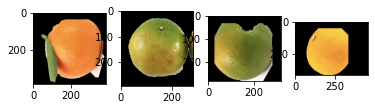

[ 66.04836481 123.07815139 140.2336097 ] 15.33%
[ 74.63262072 147.36568347 237.76355953] 84.67%
[101.13127637 186.25419803 199.30416081] 27.61%
[ 47.6700186  132.41600731 143.04608644] 72.39%
[111.33230379 184.57947256 203.93616853] 22.81%
[ 51.63831833 126.65348903 123.52168918] 77.19%
[ 58.22237123 161.40679256 239.56384791] 42.15%
[ 68.45113397 192.04897152 246.14849684] 57.85%


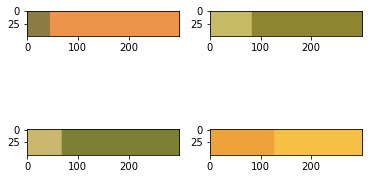

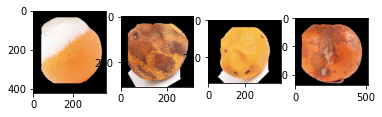

[228.27986497 234.71576987 245.11864505] 38.90%
[ 80.78273517 158.50050953 241.98028571] 61.10%
[202.7915707  214.44104099 230.87309995] 13.78%
[ 71.74612632 114.48195971 186.48634989] 86.22%
[220.67867684 228.69689567 243.0502799 ] 13.46%
[ 76.53283724 174.79437935 239.77208676] 86.54%
[ 52.98298058  92.4132038  193.10565575] 47.97%
[ 86.88234609 133.76509329 225.54198691] 52.03%


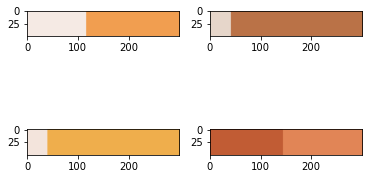

In [10]:
import cv2, numpy as np
from sklearn.cluster import KMeans

def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

def retreive_cluster(image):
    reshape = image.reshape((image.shape[0] * image.shape[1], 3))
    reshape = [c for c in reshape if np.mean(c) > 10]
    if(len(reshape) == 0):
        reshape = image.reshape((image.shape[0] * image.shape[1], 3))
    # Find and display most dominant colors
    return KMeans(n_clusters=2,max_iter=30).fit(reshape)

def visualize_img_colors(image):
    cluster = retreive_cluster(image)
    visualize = visualize_colors(cluster, cluster.cluster_centers_)
    visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
    plt.imshow(visualize)


### FRESH ORANGES

#Import fresh orange images
fresh = random.sample(train_fresh_oranges, 4)

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(fresh[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(fresh[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(fresh[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(fresh[3], cv.COLOR_BGR2RGB))
plt.show()

plt.subplot(221)
visualize_img_colors(fresh[0])
plt.subplot(222)
visualize_img_colors(fresh[1])
plt.subplot(223)
visualize_img_colors(fresh[2])
plt.subplot(224)
visualize_img_colors(fresh[3])
plt.show()

### ROTTEN ORANGES

#Import rotten orange images
rotten = random.sample(train_rotten_oranges, 4)

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(rotten[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(rotten[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(rotten[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(rotten[3], cv.COLOR_BGR2RGB))
plt.show()

plt.subplot(221)
visualize_img_colors(rotten[0])
plt.subplot(222)
visualize_img_colors(rotten[1])
plt.subplot(223)
visualize_img_colors(rotten[2])
plt.subplot(224)
visualize_img_colors(rotten[3])
plt.show()

In [6]:
fersh_models = [
    [52.62208916, 114.64789262, 191.99140849],
    [66.14225837, 156.23681529, 235.72209725],
    [154.04304245, 205.27174233, 245.21182193],
    [58.95040263, 139.46691227, 238.31044096],
    [100.22536713, 185.77643777, 242.83468701],
    [60.22376481, 152.86220761, 232.49610936],
]
rotten_models = [
    [109.5730499, 121.9958566, 118.94338858],
    [176.63736994, 194.73121032, 208.27683409],
    [118.64531228, 159.21845076, 182.77708304],
    [187.26338168, 214.30514761, 230.66219354],
    [58.06415674, 90.81664014, 200.51764448],
    [155.15345627, 169.02749919, 207.80108918],
    [68.27130682, 110.67613636, 170.58948864],
    [25.20906983, 26.60286873, 40.26716894],
    [106.92118046, 119.86577766, 117.860966],
    [177.10820732, 191.77796114, 200.74842555],
]

def cluster_score(image):
    cluster_centers = retreive_cluster(image).cluster_centers_
    fresh = np.min([np.linalg.norm(center-model) for model in fersh_models for center in cluster_centers])
    rotten = np.min([np.linalg.norm(center-model) for model in rotten_models for center in cluster_centers])
    return (fresh - rotten) / (fresh + rotten + .1)

Notice : looks like rotten orange have wider red and green histograms than fresh orange ones.

fresh image1 average 0.298776001982903
fresh image2 average 0.44810402773134383
fresh image3 average 0.41451099155591975
fresh image4 average 0.34688369066552216


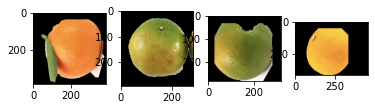

rotten image1 average 0.27766753553767937
rotten image2 average 0.6595693275206338
rotten image3 average 0.3645760529511774
rotten image4 average 0.4679454412839598


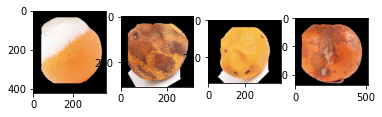

In [12]:
threshold = 1

def abs_dst(image):
    ddepth = cv.CV_16S
    kernel_size = 5
    # Remove noise by blurring with a Gaussian filter
    image_blur = cv.GaussianBlur(image, (3, 3), 0)
    # Convert the image to grayscale
    image_gray = cv.cvtColor(image_blur, cv.COLOR_BGR2GRAY)
    # Apply Laplace function
    dst = cv.Laplacian(image_gray, ddepth, ksize=kernel_size)
    # converting back to uint8
    return cv.convertScaleAbs(dst)

# LAPLACE SCORE

def laplace_score(image):
    arr = np.asarray(abs_dst(image)).flatten()
    filter_arr = arr > threshold
    newarr = arr[filter_arr]
    if(len(newarr) == 0):
        return 0
    return newarr.mean() / 255

### FRESH ORANGES

print("fresh image1 average", laplace_score(fresh[0]))
print("fresh image2 average", laplace_score(fresh[1]))
print("fresh image3 average", laplace_score(fresh[2]))
print("fresh image4 average", laplace_score(fresh[3]))

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(fresh[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(fresh[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(fresh[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(fresh[3], cv.COLOR_BGR2RGB))
plt.show()

### ROTTEN ORANGES

print("rotten image1 average", laplace_score(rotten[0]))
print("rotten image2 average", laplace_score(rotten[1]))
print("rotten image3 average", laplace_score(rotten[2]))
print("rotten image4 average", laplace_score(rotten[3]))

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(rotten[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(rotten[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(rotten[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(rotten[3], cv.COLOR_BGR2RGB))
plt.show()

Now, let's plot our feature vector over the whole train dataset !

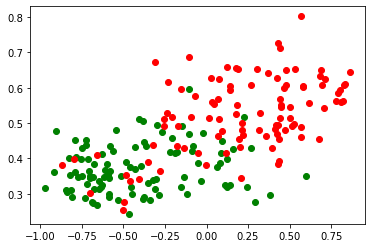

In [13]:
fresh_vectors = np.asarray([[cluster_score(fresh), laplace_score(fresh)] for fresh in train_fresh_oranges]).T
rotten_vectors = np.asarray([[cluster_score(rotten), laplace_score(rotten)] for rotten in train_rotten_oranges]).T

# scatter fresh vectors
xf, yf = fresh_vectors
plt.scatter(xf,yf,color="green")

# scatter rotten vectors
xr, yr = rotten_vectors
plt.scatter(xr,yr,color="red")

plt.show()


Deduce the accuracy (Binary Classification, Logistic Regression) :

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

# create the binary classifier
(_, lf) = np.shape(fresh_vectors)
(_, lr) = np.shape(rotten_vectors)
X = np.concatenate((fresh_vectors, rotten_vectors), axis=1)
y = np.concatenate((np.full((lf), 0), np.full((lr), 1)))
X, y = shuffle(X.T, y, random_state=0)

clf = LogisticRegression(random_state=0).fit(X, y)

# load the test vectors
test_fresh_vectors = fresh_vectors
test_rotten_vectors = rotten_vectors

# calculate the accuracy
(_, ltf) = np.shape(test_fresh_vectors)
(_, ltr) = np.shape(test_rotten_vectors)
tX = np.concatenate((test_fresh_vectors.T, test_rotten_vectors.T), axis=0)
ty = np.concatenate((np.full((ltf), 0), np.full((ltr), 1)))

print("Acc :")
print(1-np.mean(np.abs(clf.predict(tX)-ty)))

Acc :
0.8049999999999999
